# Step 0: Imports

In [410]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
%matplotlib inline


# step 1 : Read a data 

In [411]:
df = pd.read_csv('data.csv')

In [412]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/2015 23:24,male,1.0000,yes,1.0,12/5/2013 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/2015 12:40,6.590000e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/2015 23:30,male,1.0000,yes,1.0,10/1/2012 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,‰غدIt felt like they were my friends and I was...,NaN,7471,10/26/2015 12:40,6.590000e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/2015 23:33,male,0.6625,yes,1.0,11/28/2014 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/2015 12:40,6.590000e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/2015 23:10,male,1.0000,yes,1.0,6/11/2009 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/2015 12:40,6.590000e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/2015 1:15,female,1.0000,yes,1.0,4/16/2014 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/2015 12:40,6.590000e+17,NaN,NaN


In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

In [414]:
df.shape

(20050, 26)

# step 3 : Cleaning Data

In [415]:
df = df.drop(['gender_gold','profile_yn_gold','tweet_coord','tweet_id','tweet_location','user_timezone'],axis = 1)

In [223]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,link_color,name,profileimage,retweet_count,sidebar_color,text,tweet_count,tweet_created
0,815719226,False,finalized,3,10/26/2015 23:24,male,1.0000,yes,1.0,12/5/2013 1:48,i sing my own rhythm.,0,08C2C2,sheezy0,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964,10/26/2015 12:40
1,815719227,False,finalized,3,10/26/2015 23:30,male,1.0000,yes,1.0,10/1/2012 13:51,I'm the author of novels filled with family dr...,68,0084B4,DavdBurnett,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,‰غدIt felt like they were my friends and I was...,7471,10/26/2015 12:40
2,815719228,False,finalized,3,10/26/2015 23:33,male,0.6625,yes,1.0,11/28/2014 11:30,louis whining and squealing and all,7696,ABB8C2,lwtprettylaugh,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,5617,10/26/2015 12:40
3,815719229,False,finalized,3,10/26/2015 23:10,male,1.0000,yes,1.0,6/11/2009 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0084B4,douggarland,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693,10/26/2015 12:40
4,815719230,False,finalized,3,10/27/2015 1:15,female,1.0000,yes,1.0,4/16/2014 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,3B94D9,WilfordGemma,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,31462,10/26/2015 12:40


In [224]:
df.shape

(20050, 20)

In [225]:
df.isnull().sum()

_unit_id                    0
_golden                     0
_unit_state                 0
_trusted_judgments          0
_last_judgment_at          50
gender                     97
gender:confidence          26
profile_yn                  0
profile_yn:confidence       0
created                     0
description              3744
fav_number                  0
link_color                  0
name                        0
profileimage                0
retweet_count               0
sidebar_color               0
text                        0
tweet_count                 0
tweet_created               0
dtype: int64

In [226]:
##أمر unique() لمعرفة محتويات المصفوفة او ليست او القائمة و وضعها في مصفوفة 

In [227]:
df['gender'].unique()

array(['male', 'female', 'brand', 'unknown', nan], dtype=object)

In [228]:
df = df[df['gender'] != 'nan']

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20050 entries, 0 to 20049
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  link_color             20050 non-null  object 
 13  name                   20050 non-null  object 
 14  profileimage           20050 non-null  object 
 15  re

In [230]:
# حذف الصفوف ذات القيم الفارغة في عمود gender 

In [231]:
df = df.dropna(subset = ['gender'])

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19953 entries, 0 to 20049
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               19953 non-null  int64  
 1   _golden                19953 non-null  bool   
 2   _unit_state            19953 non-null  object 
 3   _trusted_judgments     19953 non-null  int64  
 4   _last_judgment_at      19903 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      19953 non-null  float64
 7   profile_yn             19953 non-null  object 
 8   profile_yn:confidence  19953 non-null  float64
 9   created                19953 non-null  object 
 10  description            16224 non-null  object 
 11  fav_number             19953 non-null  int64  
 12  link_color             19953 non-null  object 
 13  name                   19953 non-null  object 
 14  profileimage           19953 non-null  object 
 15  re

In [233]:
# ملء القيم التي تحوي على nan بمسافة فارغة 

In [234]:
df = df.replace(np.nan, '', regex = True)

In [235]:
df = df[df['gender'] != 'unknown']

In [236]:
df.isnull().sum()

_unit_id                 0
_golden                  0
_unit_state              0
_trusted_judgments       0
_last_judgment_at        0
gender                   0
gender:confidence        0
profile_yn               0
profile_yn:confidence    0
created                  0
description              0
fav_number               0
link_color               0
name                     0
profileimage             0
retweet_count            0
sidebar_color            0
text                     0
tweet_count              0
tweet_created            0
dtype: int64

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18836 entries, 0 to 20049
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               18836 non-null  int64  
 1   _golden                18836 non-null  bool   
 2   _unit_state            18836 non-null  object 
 3   _trusted_judgments     18836 non-null  int64  
 4   _last_judgment_at      18836 non-null  object 
 5   gender                 18836 non-null  object 
 6   gender:confidence      18836 non-null  float64
 7   profile_yn             18836 non-null  object 
 8   profile_yn:confidence  18836 non-null  float64
 9   created                18836 non-null  object 
 10  description            18836 non-null  object 
 11  fav_number             18836 non-null  int64  
 12  link_color             18836 non-null  object 
 13  name                   18836 non-null  object 
 14  profileimage           18836 non-null  object 
 15  re

In [238]:
df['gender'].unique()

array(['male', 'female', 'brand'], dtype=object)

In [239]:
df.shape

(18836, 20)

In [240]:
# حذف بعض الأعمدة 

In [241]:
df = df.drop(['_unit_state', 'created', 'tweet_created', 'sidebar_color', 'link_color', 'profileimage', '_last_judgment_at', '_trusted_judgments'],axis = 1)

In [242]:
df.head()

,_unit_id,_golden,gender,gender:confidence,profile_yn,profile_yn:confidence,description,fav_number,name,retweet_count,text,tweet_count
0,815719226,False,male,1.0000,yes,1.0,i sing my own rhythm.,0,sheezy0,0,Robbie E Responds To Critics After Win Against...,110964
1,815719227,False,male,1.0000,yes,1.0,I'm the author of novels filled with family dr...,68,DavdBurnett,0,‰غدIt felt like they were my friends and I was...,7471
2,815719228,False,male,0.6625,yes,1.0,louis whining and squealing and all,7696,lwtprettylaugh,1,i absolutely adore when louis starts the songs...,5617
3,815719229,False,male,1.0000,yes,1.0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,douggarland,0,Hi @JordanSpieth - Looking at the url - do you...,1693
4,815719230,False,female,1.0000,yes,1.0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,WilfordGemma,0,Watching Neighbours on Sky+ catching up with t...,31462


In [243]:
df.shape

(18836, 12)

In [244]:
#LabelEnconder يستخدم في تصنيف القيم التي في العمود

In [245]:
from sklearn.preprocessing import LabelEncoder
labelen = LabelEncoder()

In [246]:
df['gender1'] = labelen.fit_transform(df['gender'])
df['profile_yn1'] = labelen.fit_transform(df['profile_yn'])
df.head()

,_unit_id,_golden,gender,gender:confidence,profile_yn,profile_yn:confidence,description,fav_number,name,retweet_count,text,tweet_count,gender1,profile_yn1
0,815719226,False,male,1.0000,yes,1.0,i sing my own rhythm.,0,sheezy0,0,Robbie E Responds To Critics After Win Against...,110964,2,0
1,815719227,False,male,1.0000,yes,1.0,I'm the author of novels filled with family dr...,68,DavdBurnett,0,‰غدIt felt like they were my friends and I was...,7471,2,0
2,815719228,False,male,0.6625,yes,1.0,louis whining and squealing and all,7696,lwtprettylaugh,1,i absolutely adore when louis starts the songs...,5617,2,0
3,815719229,False,male,1.0000,yes,1.0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,douggarland,0,Hi @JordanSpieth - Looking at the url - do you...,1693,2,0
4,815719230,False,female,1.0000,yes,1.0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,WilfordGemma,0,Watching Neighbours on Sky+ catching up with t...,31462,1,0


In [247]:
df['gender1'].value_counts()

1    6700
2    6194
0    5942
Name: gender1, dtype: int64

In [248]:
#Balancing the Dataset

In [249]:
df.describe()

,_unit_id,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,gender1,profile_yn1
count,1.883600e+04,18836.000000,18836.000000,18836.000000,18836.000000,1.883600e+04,18836.000000,18836.0
mean,8.157295e+08,0.900997,0.994623,4413.461563,0.082502,3.913570e+04,1.013379,0.0
std,6.010412e+03,0.172980,0.042132,12468.532705,2.732317,1.191306e+05,0.802592,0.0
min,8.157192e+08,0.314000,0.627200,0.000000,0.000000,1.000000e+00,0.000000,0.0
25%,8.157243e+08,0.686475,1.000000,13.000000,0.000000,2.399750e+03,0.000000,0.0
50%,8.157294e+08,1.000000,1.000000,482.500000,0.000000,1.131250e+04,1.000000,0.0
75%,8.157345e+08,1.000000,1.000000,3375.500000,0.000000,3.979350e+04,2.000000,0.0
max,8.157580e+08,1.000000,1.000000,341621.000000,330.000000,2.680199e+06,2.000000,0.0


In [250]:
# ترتيب موثوقية الجنس تصاعدياً

In [251]:
df = df.sort_values('gender:confidence', ascending = True)
df

,_unit_id,_golden,gender,gender:confidence,profile_yn,profile_yn:confidence,description,fav_number,name,retweet_count,text,tweet_count,gender1,profile_yn1
12304,815731718,False,brand,0.3140,yes,0.6272,NUNCA me olvides...||RUNAWAY|| I & A||lo que s...,68,AlmiiCuello,0,You and you.,2885,0,0
17454,815736986,False,male,0.3206,yes,0.6308,Being Human ! And Believe In Humanity.....,106,Chota_Qureshi,0,"Misbah-ul-Haq on Younis Khan. "" He keeps the g...",3531,2,0
9252,815728595,False,female,0.3223,yes,0.6444,eu to aqui sentada em frente a um computador a...,4055,worthzouisit,0,37 new unfollowers and 24 new followers (hello...,20077,1,0
17215,815736743,False,male,0.3223,yes,0.6436,You're such a fucking hypocrite,1519,JoaoLeite22,0,"And you don't feel much like ridin', you just ...",13521,2,0
3562,815722858,False,male,0.3268,yes,0.6361,,17,johnortegon,0,@Radioacktiva_ #RadioacktivaMuse TODAY IS THE ...,1734,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7695,815727015,False,female,1.0000,yes,1.0000,Dont follow me because I dont even know where ...,0,40WANDARuby3,0,Fighting with the bae. _ظ÷â_ظ÷â_ظ÷چ https://t....,9406,1,0
7696,815727016,False,female,1.0000,yes,1.0000,,6345,kerminiooo,0,Watch me goin out of the way when I shoulda we...,22299,1,0
7697,815727017,False,female,1.0000,yes,1.0000,I Live....I Laugh...and I Love...and when i Lo...,67,4f8e24939bf9431,0,Looks like I'm the worst of the worst now....,45240,1,0
7703,815727023,False,female,1.0000,yes,1.0000,,4168,caitlynboyd1,0,"Ok people get with it or get out of the way, I...",10379,1,0


In [252]:
df = df[df['gender:confidence']>=0.6]
df

,_unit_id,_golden,gender,gender:confidence,profile_yn,profile_yn:confidence,description,fav_number,name,retweet_count,text,tweet_count,gender1,profile_yn1
20017,815753796,True,brand,0.6059,yes,1.0,,0,04630lktc,0,Get Weather Updates from The Weather Channel. ...,63448,0,0
11315,815730697,False,male,0.6212,yes,1.0,I love me . Do you love me too ? LOL,15,JamieLarsons,0,"#Life Build a Transforming Workbench, Desk, an...",9317,2,0
18410,815737970,False,brand,0.6212,yes,1.0,"Chaac, the god of rain. hope you dont hit like...",1820,chaacSmite,0,@Goddess0fWar_ I know right friend? Always so...,2368,0,0
19082,815738651,False,male,0.6252,yes,1.0,,2,QuennonBalls,0,EVERYDAYILOVEYOU Forevermore\n\nand what makes...,45504,2,0
11168,815730546,False,female,0.6252,yes,1.0,Treat Yaself!,41,LittleMixLoves_,0,I'm so annoyed. Like my interview was at 4 it'...,2137,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7695,815727015,False,female,1.0000,yes,1.0,Dont follow me because I dont even know where ...,0,40WANDARuby3,0,Fighting with the bae. _ظ÷â_ظ÷â_ظ÷چ https://t....,9406,1,0
7696,815727016,False,female,1.0000,yes,1.0,,6345,kerminiooo,0,Watch me goin out of the way when I shoulda we...,22299,1,0
7697,815727017,False,female,1.0000,yes,1.0,I Live....I Laugh...and I Love...and when i Lo...,67,4f8e24939bf9431,0,Looks like I'm the worst of the worst now....,45240,1,0
7703,815727023,False,female,1.0000,yes,1.0,,4168,caitlynboyd1,0,"Ok people get with it or get out of the way, I...",10379,1,0


In [253]:
# عدد التغريدات تنازلياً

In [254]:
df = df.sort_values('tweet_count', ascending = False)
df

,_unit_id,_golden,gender,gender:confidence,profile_yn,profile_yn:confidence,description,fav_number,name,retweet_count,text,tweet_count,gender1,profile_yn1
15940,815735441,False,male,1.0000,yes,1.0,Confira as ultimas notج_cias do que estجء acon...,81372,gabrieldsmqs,0,One State‰غھs Struggle to Make Ends Meet: Why ...,2680199,2,0
5093,815724399,False,brand,1.0000,yes,1.0,The Map Game is a free geography quiz based on...,1,Map_Game,0,Where is Pinellas Park on the map? Play the ga...,2372591,0,0
4245,815723544,False,brand,0.6561,yes,1.0,The Map Game is a free geography quiz based on...,1,Map_Game,0,Where is Doha on the map? Play the game at htt...,2372591,0,0
5563,815724872,False,brand,1.0000,yes,1.0,The Map Game is a free geography quiz based on...,1,Map_Game,0,Can you find Calcutta on the map? Just try it ...,2372591,0,0
6371,815725682,False,brand,1.0000,yes,1.0,The Map Game is a free geography quiz based on...,1,Map_Game,0,Can you find Pune on the map? Just try it at h...,2372591,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10650,815730017,False,male,0.6723,yes,1.0,- *ىؤ_ü*\n- ‰مز„س„â'„¥ ë±‰ِâë_„س_ü„âىة„ڈ„س‰د¬\...,0,GettoAndreaa,0,Give a man a fish and feed him for a day. Don'...,1,2,0
12938,815732371,False,female,1.0000,yes,1.0,,1,leeh_Fernanda4,0,I Just Voted for @onedirection for #ArtistOfTh...,1,1,0
10213,815729575,False,female,1.0000,yes,1.0,,0,HyltonSandra,0,The Lord is my light and my salvation :Psalm 2...,1,1,0
1076,815720309,False,male,1.0000,yes,1.0,,0,izzyortiz211,0,Walking with the best person ever @KaileiMadison,1,2,0


In [255]:
# التغريدات أكثر من 1000

In [256]:
df = df[df['tweet_count']>=1000]
df

,_unit_id,_golden,gender,gender:confidence,profile_yn,profile_yn:confidence,description,fav_number,name,retweet_count,text,tweet_count,gender1,profile_yn1
15940,815735441,False,male,1.0000,yes,1.0,Confira as ultimas notج_cias do que estجء acon...,81372,gabrieldsmqs,0,One State‰غھs Struggle to Make Ends Meet: Why ...,2680199,2,0
5093,815724399,False,brand,1.0000,yes,1.0,The Map Game is a free geography quiz based on...,1,Map_Game,0,Where is Pinellas Park on the map? Play the ga...,2372591,0,0
4245,815723544,False,brand,0.6561,yes,1.0,The Map Game is a free geography quiz based on...,1,Map_Game,0,Where is Doha on the map? Play the game at htt...,2372591,0,0
5563,815724872,False,brand,1.0000,yes,1.0,The Map Game is a free geography quiz based on...,1,Map_Game,0,Can you find Calcutta on the map? Just try it ...,2372591,0,0
6371,815725682,False,brand,1.0000,yes,1.0,The Map Game is a free geography quiz based on...,1,Map_Game,0,Can you find Pune on the map? Just try it at h...,2372591,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8608,815727940,False,male,1.0000,yes,1.0,76 years young. A Houston Texan fan (Oilers go...,3499,nobulltexan,0,Would the Texans &amp; Colts swap coaches &amp...,1003,2,0
882,815720111,False,male,1.0000,yes,1.0,San Diego,174,omgitscharms,0,It's such a prefect day to go to the beach,1002,2,0
14781,815734250,False,female,1.0000,yes,1.0,,297,brigibas,0,My teacher noticed everyone looked tired and t...,1002,1,0
8060,815727382,False,female,1.0000,yes,1.0,"What's life without LOVE! Think positive, be h...",1642,StephanieDiN,0,Scarf hair is in full effect. Aka: a bird size...,1001,1,0


In [257]:
df.describe()

,_unit_id,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,gender1,profile_yn1
count,1.530800e+04,15308.000000,15308.000000,15308.000000,15308.000000,1.530800e+04,15308.000000,15308.0
mean,8.157294e+08,0.918488,0.995953,5065.567873,0.094852,4.620844e+04,1.005879,0.0
std,5.990187e+03,0.143034,0.036579,13163.706151,3.027328,1.287762e+05,0.798978,0.0
min,8.157192e+08,0.605900,0.632300,0.000000,0.000000,1.000000e+03,0.000000,0.0
25%,8.157243e+08,1.000000,1.000000,21.000000,0.000000,5.455750e+03,0.000000,0.0
50%,8.157292e+08,1.000000,1.000000,806.000000,0.000000,1.721450e+04,1.000000,0.0
75%,8.157344e+08,1.000000,1.000000,4331.000000,0.000000,4.613075e+04,2.000000,0.0
max,8.157580e+08,1.000000,1.000000,341621.000000,330.000000,2.680199e+06,2.000000,0.0


In [258]:
df = df[df['tweet_count']<=500000]
df

,_unit_id,_golden,gender,gender:confidence,profile_yn,profile_yn:confidence,description,fav_number,name,retweet_count,text,tweet_count,gender1,profile_yn1
19198,815738771,False,brand,1.0000,yes,1.0,"Legitimate reviews from 100% people, every two...",0,RealHumanPraise,0,a heart that's both uproariously wicked (often...,487647,0,0
12753,815732177,False,brand,1.0000,yes,1.0,"A Site Where People Find Local MLM, Direct Sal...",0,findsalesrepcom,0,Find #Avon product and business reps in #New Y...,474846,0,0
6272,815725583,False,brand,0.6414,yes,1.0,‰رـ •_ہ•_ہ•_ہ•_ہ•_ہ\n‹غغ‹غغ‹غغ ‰ِ´‹غغJEKETI‹...,5,wotanonymous,0,VIDEO: James Bond Spectre world premiere: Afte...,465759,0,0
13637,815733085,False,female,1.0000,yes,1.0,"Works for the NHS. Geek. Likes history, politi...",5524,Moonbootica,0,"Sylvie Guillem, Tamara Rojo and Anna Pavlova (...",461093,1,0
10897,815730269,False,brand,1.0000,yes,1.0,"Bite-sized news, that keeps you updated.",2,StrawberryNG,0,"Build a Transforming Workbench, Desk, and Stor...",456724,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8608,815727940,False,male,1.0000,yes,1.0,76 years young. A Houston Texan fan (Oilers go...,3499,nobulltexan,0,Would the Texans &amp; Colts swap coaches &amp...,1003,2,0
882,815720111,False,male,1.0000,yes,1.0,San Diego,174,omgitscharms,0,It's such a prefect day to go to the beach,1002,2,0
14781,815734250,False,female,1.0000,yes,1.0,,297,brigibas,0,My teacher noticed everyone looked tired and t...,1002,1,0
8060,815727382,False,female,1.0000,yes,1.0,"What's life without LOVE! Think positive, be h...",1642,StephanieDiN,0,Scarf hair is in full effect. Aka: a bird size...,1001,1,0


In [259]:
df['gender1'].value_counts()

1    5521
2    4903
0    4752
Name: gender1, dtype: int64

In [260]:
#نلاحظ هنا أنا اللتي فرضت أن عدد الرجال 4903 لان النساء عددهم 4903 و راح أحذف بيانات البراند 

In [261]:
male_df = df[df['gender1'] == 1][:4903]
female_df = df[df['gender1'] == 2]
female_df.shape,male_df.shape

df = male_df
df = df.append(female_df)

In [262]:
df.shape

(9806, 14)

In [263]:
df['gender1'].value_counts()

1    4903
2    4903
Name: gender1, dtype: int64

In [264]:
df.describe()

,_unit_id,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,gender1,profile_yn1
count,9.806000e+03,9806.000000,9806.000000,9806.000000,9806.000000,9806.000000,9806.000000,9806.0
mean,8.157297e+08,0.932819,0.995887,6648.494391,0.080767,33213.458393,1.500000,0.0
std,6.204691e+03,0.133473,0.036945,14106.109814,1.740657,49314.941780,0.500025,0.0
min,8.157192e+08,0.621200,0.637300,0.000000,0.000000,1000.000000,1.000000,0.0
25%,8.157239e+08,1.000000,1.000000,345.000000,0.000000,5878.750000,1.000000,0.0
50%,8.157301e+08,1.000000,1.000000,1991.000000,0.000000,14767.000000,1.500000,0.0
75%,8.157350e+08,1.000000,1.000000,6734.750000,0.000000,38583.500000,2.000000,0.0
max,8.157580e+08,1.000000,1.000000,341621.000000,153.000000,461093.000000,2.000000,0.0


In [265]:
#Cleaning the tweet text 

In [266]:
tweets = list(df['text'])
tweets[5]

'Two Sisters were Beaten and Held Hostage by Men They Met On Facebook! https://t.co/5cgR48doX7'

In [267]:
# أمر split لتقسيم النص 

In [268]:
# أمر .strip() إرجاع النص الأصلي بدون فواصل أو فراغات 

In [269]:
#أولاً يدخل النص من اللوب ثم يتم استدعاء الدالة بحيث يخرج لنا نص التغريدة بأحرف صغيرة و خالية من العلامات البادئة @ و # و\\ 

In [270]:
def strip_all_entities(text):
    words = []
    entity_prefixes = ['@','#','\\']

    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)


for i in range(0,len(tweets)):
    tweets[i] = tweets[i].lower()
    tweets[i] = strip_all_entities(tweets[i])
  


tweets[5]

'two sisters were beaten and held hostage by men they met on facebook! https://t.co/5cgr48dox7'

In [271]:
# حذف الروابط من أول خمس تغريدات 

In [272]:
def remove_links(text):
    words = []
    for word in text.split():
        if not 'https' in word:
            words.append(word)
    return ' '.join(words)


for i in range(0,len(tweets)):
    tweets[i] = remove_links(tweets[i])
    tweets[i] = tweets[i].replace("[^a-zA-Z#]"," ")
tweets[0:5]

['sylvie guillem, tamara rojo and anna pavlova (aced the ballet round!)',
 'one state‰غھs struggle to make ends meet: why illinois is without a budget',
 'and ive never seen men describe a realistic woman on here',
 'daily mail eat your greens! why eating fruit and vegetables in youth protects your heart ... daily mail people who‰غ_',
 'build a transforming workbench, desk, and storage unit: if you don‰غھt have a lot of space, you need to make cre...']

In [273]:
# حذف العلامات البادئة و علامات الترقيم 

In [274]:
def remove_punc(text):
    words = nltk.word_tokenize(text) ## فصل الكلمات 
    words=[word for word in words if word.isalpha()]
    return ' '.join(words)

for i in range(0,len(tweets)):
    tweets[i] = remove_punc(tweets[i])

tweets[0:10]

['sylvie guillem tamara rojo and anna pavlova aced the ballet round',
 'one struggle to make ends meet why illinois is without a budget',
 'and ive never seen men describe a realistic woman on here',
 'daily mail eat your greens why eating fruit and vegetables in youth protects your heart daily mail people',
 'build a transforming workbench desk and storage unit if you have a lot of space you need to make cre',
 'two sisters were beaten and held hostage by men they met on facebook',
 'kourtney kardashian and kris jenner are pregnant again amp brvbar',
 'amy schumer let amp amp s talk about the way we talk about women and sex',
 'the college recruitment of russell wilson',
 'and childish goin thru phones is stupid and insecure']

In [275]:
# )حذف (كلمات التوقف stopwords في أول 10 تغريدات 

In [276]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = nltk.word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

for i in range(0,len(tweets)):
    tweets[i] = remove_stopwords(tweets[i])

tweets[0:10]

['sylvie guillem tamara rojo anna pavlova aced ballet round',
 'one struggle make ends meet illinois without budget',
 'ive never seen men describe realistic woman',
 'daily mail eat greens eating fruit vegetables youth protects heart daily mail people',
 'build transforming workbench desk storage unit lot space need make cre',
 'two sisters beaten held hostage men met facebook',
 'kourtney kardashian kris jenner pregnant amp brvbar',
 'amy schumer let amp amp talk way talk women sex',
 'college recruitment russell wilson',
 'childish goin thru phones stupid insecure']

In [277]:
# إرجاع جذر الكلمة أي بدون جمع 

In [278]:
from nltk.stem import WordNetLemmatizer

lemm = WordNetLemmatizer()

def get_root_words(text):
    words = nltk.word_tokenize(text)
    words = [lemm.lemmatize(word) for word in words]
    return " ".join(words)

for i in range(0,len(tweets)):
    tweets[i] = get_root_words(tweets[i])

tweets[0:10]

['sylvie guillem tamara rojo anna pavlova aced ballet round',
 'one struggle make end meet illinois without budget',
 'ive never seen men describe realistic woman',
 'daily mail eat green eating fruit vegetable youth protects heart daily mail people',
 'build transforming workbench desk storage unit lot space need make cre',
 'two sister beaten held hostage men met facebook',
 'kourtney kardashian kris jenner pregnant amp brvbar',
 'amy schumer let amp amp talk way talk woman sex',
 'college recruitment russell wilson',
 'childish goin thru phone stupid insecure']

In [279]:
# هنا تم تنزيل المرادفات في اللغة الإنجليزية 

In [280]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [281]:
df['tweets'] = tweets

df.head()

,_unit_id,_golden,gender,gender:confidence,profile_yn,profile_yn:confidence,description,fav_number,name,retweet_count,text,tweet_count,gender1,profile_yn1,tweets
13637,815733085,False,female,1.0000,yes,1.000,"Works for the NHS. Geek. Likes history, politi...",5524,Moonbootica,0,"Sylvie Guillem, Tamara Rojo and Anna Pavlova (...",461093,1,0,sylvie guillem tamara rojo anna pavlova aced b...
16314,815735824,False,female,0.6860,yes,0.686,unofficial roleplayer of گ±ü“__‘چ،“‌« ‘،©‘ّ_“¥م.,206,gdmien,0,One State‰غھs Struggle to Make Ends Meet: Why ...,447153,1,0,one struggle make end meet illinois without bu...
11671,815731063,False,female,1.0000,yes,1.000,Personification of a Paradox To Shawty Be The ...,2685,Crislex,0,@HRCage and ive never seen men describe a real...,434403,1,0,ive never seen men describe realistic woman
16283,815735791,False,female,1.0000,yes,1.000,All the news 7/7 & 24/24,0,ShannaIDK,0,Daily Mail Eat your greens! Why eating fruit a...,389295,1,0,daily mail eat green eating fruit vegetable yo...
15754,815735250,False,female,0.6595,yes,1.000,#God1st#onlygurlfriendlysimplicityisallaboutme...,15,itzmide,0,"Build a Transforming Workbench, Desk, and Stor...",379494,1,0,build transforming workbench desk storage unit...


In [282]:
df.isnull().sum()

_unit_id                 0
_golden                  0
gender                   0
gender:confidence        0
profile_yn               0
profile_yn:confidence    0
description              0
fav_number               0
name                     0
retweet_count            0
text                     0
tweet_count              0
gender1                  0
profile_yn1              0
tweets                   0
dtype: int64

In [283]:
df.corr() #لمعرفة درجة الإرتباط بين الخصائص 

,_unit_id,_golden,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,gender1,profile_yn1
_unit_id,1.000000,0.214591,-0.018806,0.023865,0.014713,0.010344,-0.015964,-0.058636,NaN
_golden,0.214591,1.000000,0.009588,0.003950,0.009669,-0.001385,-0.018964,0.015289,NaN
gender:confidence,-0.018806,0.009588,1.000000,0.224194,-0.027591,-0.001176,-0.064267,-0.040854,NaN
profile_yn:confidence,0.023865,0.003950,0.224194,1.000000,-0.003811,0.002523,-0.009338,0.008983,NaN
fav_number,0.014713,0.009669,-0.027591,-0.003811,1.000000,0.018040,0.209406,-0.065026,NaN
retweet_count,0.010344,-0.001385,-0.001176,0.002523,0.018040,1.000000,0.002462,0.014413,NaN
tweet_count,-0.015964,-0.018964,-0.064267,-0.009338,0.209406,0.002462,1.000000,-0.001760,NaN
gender1,-0.058636,0.015289,-0.040854,0.008983,-0.065026,0.014413,-0.001760,1.000000,NaN
profile_yn1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [284]:
df['description'] = df['description'].astype('string') 

In [285]:
df['name'] = df['name'].astype('string') 

In [286]:
df['text'] = df['text'].astype('string') 

In [287]:
df['tweets'] = df['tweets'].astype('string') 

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9806 entries, 13637 to 8772
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               9806 non-null   int64  
 1   _golden                9806 non-null   bool   
 2   gender                 9806 non-null   object 
 3   gender:confidence      9806 non-null   float64
 4   profile_yn             9806 non-null   object 
 5   profile_yn:confidence  9806 non-null   float64
 6   description            9806 non-null   string 
 7   fav_number             9806 non-null   int64  
 8   name                   9806 non-null   string 
 9   retweet_count          9806 non-null   int64  
 10  text                   9806 non-null   string 
 11  tweet_count            9806 non-null   int64  
 12  gender1                9806 non-null   int32  
 13  profile_yn1            9806 non-null   int32  
 14  tweets                 9806 non-null   string 
dtype

# Step 3: EDA


Data Visualization

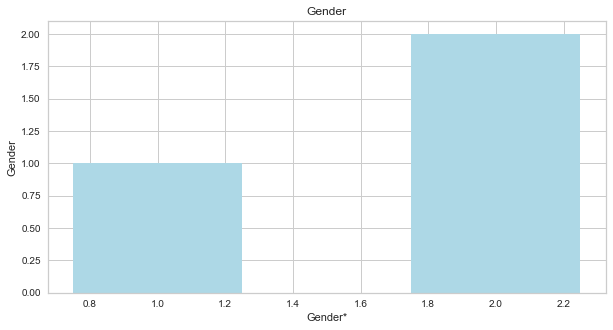

In [289]:
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(df['gender1'],df['gender1'], color ='lightblue',
        width = 0.5)
plt.xlabel("Gender*")
plt.ylabel("Gender")
plt.title("Gender")
plt.show()

In [290]:
#  رسم بياني يوضح علاقة مصداقية الجنس مع الجنس نفسه 

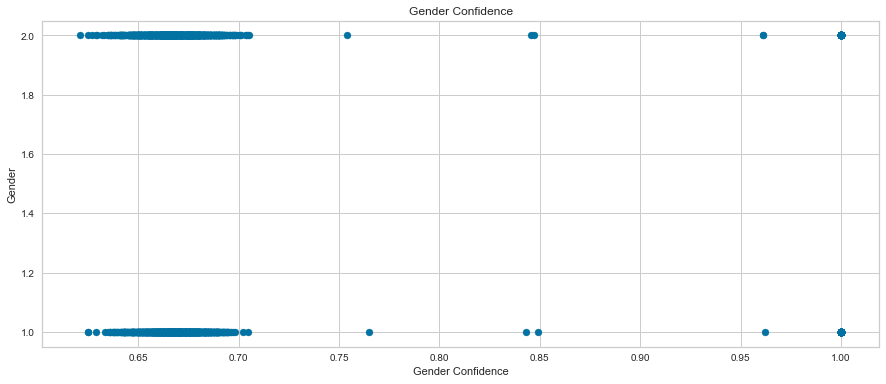

In [291]:
fig, ax = plt.subplots(figsize=(15,6))
ax.scatter(df['gender:confidence'], df['gender1'])
ax.set_xlabel('Gender Confidence')
ax.set_ylabel('Gender')
plt.title("Gender Confidence")
plt.show()

In [292]:
# رسم بياني يوضح عدد التغريدات 

Text(0.5, 1.0, 'Tweet Count')

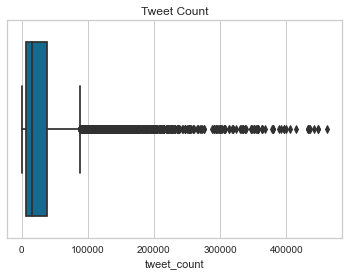

In [293]:
sb.boxplot(x=df['tweet_count'])
plt.title("Tweet Count")

In [294]:
#رسم بياني يوضح عدد التغريدات لكل جنس 

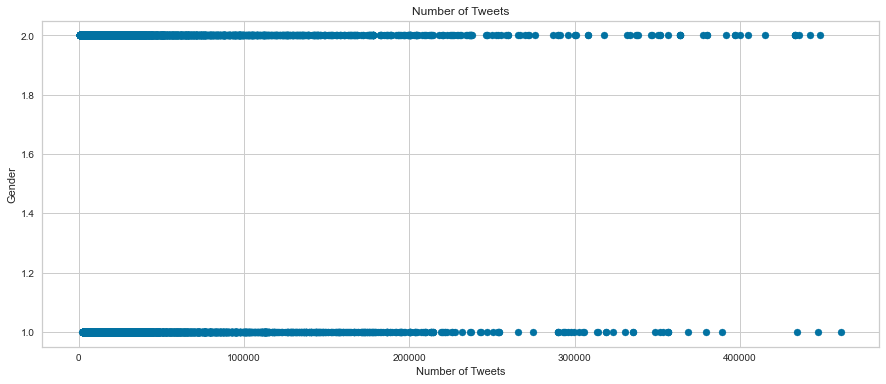

In [295]:
fig, ax = plt.subplots(figsize=(15,6))
ax.scatter(df['tweet_count'], df['gender1'])
ax.set_xlabel('Number of Tweets')
ax.set_ylabel('Gender')
plt.title("Number of Tweets")
plt.show()

In [296]:
# رسم بياني يوضح العلاقات بين الأعمدة 

In [297]:
# رسم بياني يوضح العلاقات بين الأعمدة من خلال القيمة المطلقة للإرتباط مع وضوح الأرقام 

Text(0.5, 1.0, 'The Dataset')

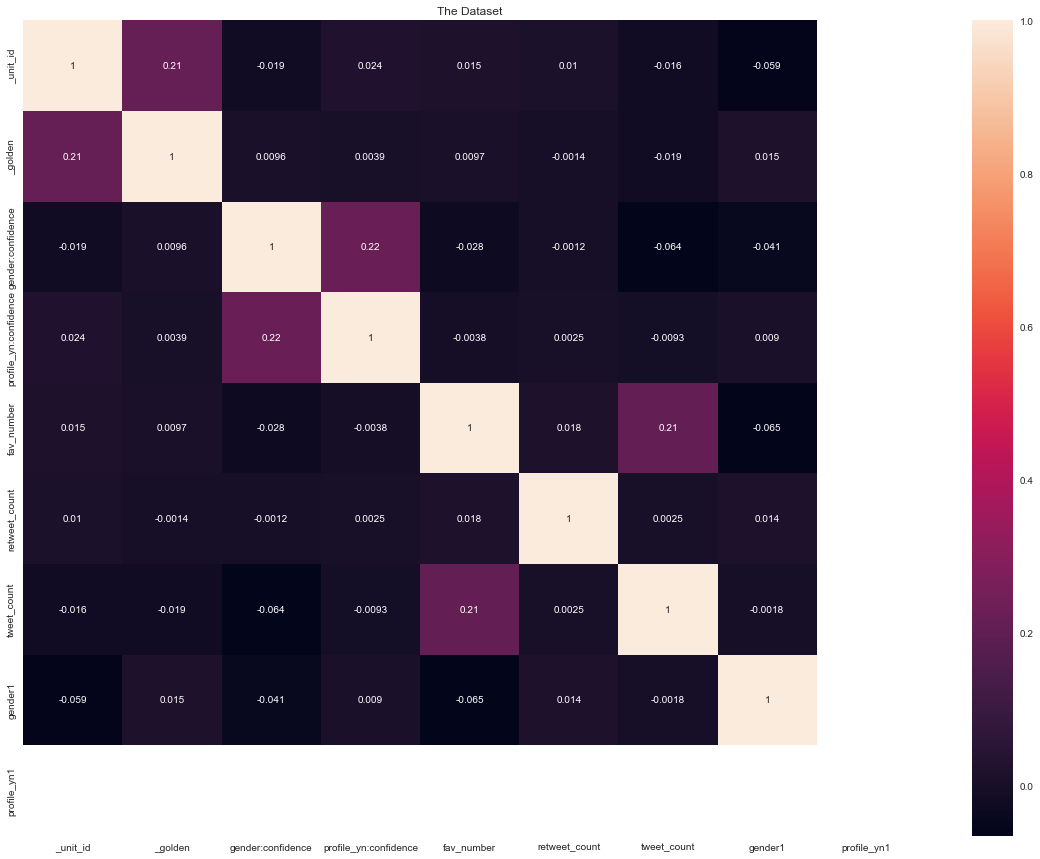

In [298]:
import seaborn as sb
plt.subplots(figsize=(20,15))
sb.heatmap(df.corr(), annot=True)
plt.title("The Dataset")



In [299]:
#16 رسم بياني يوضح علاقة الأعمدة بعضها ببعض 

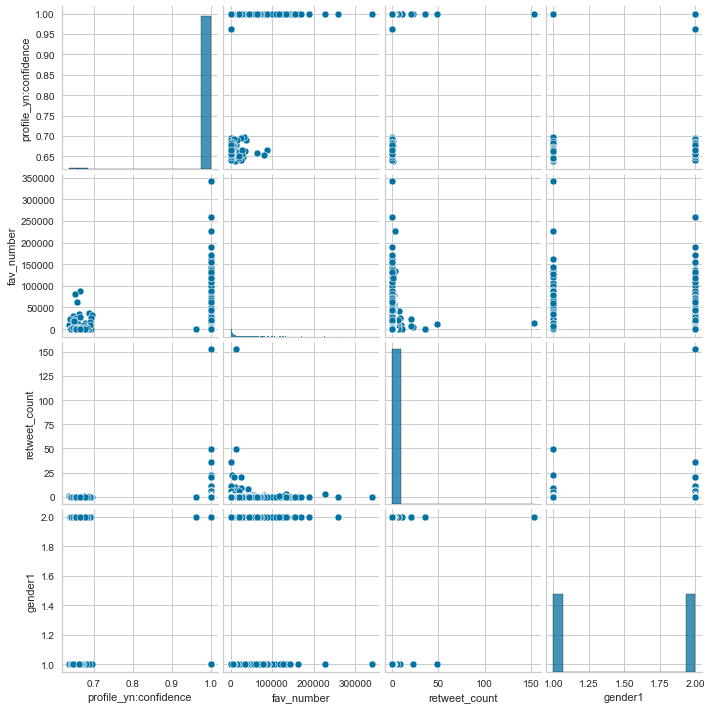

In [300]:
# the pair plot 
import seaborn as sns
sns.pairplot(data=df,vars=['profile_yn:confidence', 'fav_number','retweet_count', 'gender1',])
plt.show()


In [301]:
df.to_csv('data2.csv')
df

,_unit_id,_golden,gender,gender:confidence,profile_yn,profile_yn:confidence,description,fav_number,name,retweet_count,text,tweet_count,gender1,profile_yn1,tweets
13637,815733085,False,female,1.0000,yes,1.000,"Works for the NHS. Geek. Likes history, politi...",5524,Moonbootica,0,"Sylvie Guillem, Tamara Rojo and Anna Pavlova (...",461093,1,0,sylvie guillem tamara rojo anna pavlova aced b...
16314,815735824,False,female,0.6860,yes,0.686,unofficial roleplayer of گ±ü“__‘چ،“‌« ‘،©‘ّ_“¥م.,206,gdmien,0,One State‰غھs Struggle to Make Ends Meet: Why ...,447153,1,0,one struggle make end meet illinois without bu...
11671,815731063,False,female,1.0000,yes,1.000,Personification of a Paradox To Shawty Be The ...,2685,Crislex,0,@HRCage and ive never seen men describe a real...,434403,1,0,ive never seen men describe realistic woman
16283,815735791,False,female,1.0000,yes,1.000,All the news 7/7 & 24/24,0,ShannaIDK,0,Daily Mail Eat your greens! Why eating fruit a...,389295,1,0,daily mail eat green eating fruit vegetable yo...
15754,815735250,False,female,0.6595,yes,1.000,#God1st#onlygurlfriendlysimplicityisallaboutme...,15,itzmide,0,"Build a Transforming Workbench, Desk, and Stor...",379494,1,0,build transforming workbench desk storage unit...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5345,815724653,False,male,1.0000,yes,1.000,"Georgetown MSB'17 - G150 Rower, ë£ëشë¥, @Chubb...",1351,Tucker_Cowden,0,"""You'll need this in your job, no matter what ...",1004,2,0,need job matter banking accounting welcome msb
18709,815738275,False,male,1.0000,yes,1.000,Bank regulator. CPA.,516,jeff_lang,0,"@Wu_Tang_Finance Coincidental that MO, CO, WI,...",1004,2,0,coincidental mo co wi pa pretty low large brew...
8608,815727940,False,male,1.0000,yes,1.000,76 years young. A Houston Texan fan (Oilers go...,3499,nobulltexan,0,Would the Texans &amp; Colts swap coaches &amp...,1003,2,0,would texan amp colt swap coach amp gm
882,815720111,False,male,1.0000,yes,1.000,San Diego,174,omgitscharms,0,It's such a prefect day to go to the beach,1002,2,0,prefect day go beach


In [302]:
df.columns

Index(['_unit_id', '_golden', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'description', 'fav_number', 'name',
       'retweet_count', 'text', 'tweet_count', 'gender1', 'profile_yn1',
       'tweets'],
      dtype='object')

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9806 entries, 13637 to 8772
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               9806 non-null   int64  
 1   _golden                9806 non-null   bool   
 2   gender                 9806 non-null   object 
 3   gender:confidence      9806 non-null   float64
 4   profile_yn             9806 non-null   object 
 5   profile_yn:confidence  9806 non-null   float64
 6   description            9806 non-null   string 
 7   fav_number             9806 non-null   int64  
 8   name                   9806 non-null   string 
 9   retweet_count          9806 non-null   int64  
 10  text                   9806 non-null   string 
 11  tweet_count            9806 non-null   int64  
 12  gender1                9806 non-null   int32  
 13  profile_yn1            9806 non-null   int32  
 14  tweets                 9806 non-null   string 
dtype

# Step 4: Model

Building a Model which predicts the gender based on the numerical values given in the data
Here we use the following algorithms:
1. Logistic Regression
2. Decision Tree Classifier
3. Gaussian Naive-Bayes
4. Random Forest Classifier
5. K-Nearest Neighbours

In [304]:
#تقسيم البيانات لمجموعتين لبداية المودلنق( الإختبار و التدريب ) 

In [305]:
X = df[['gender:confidence','fav_number', 'retweet_count', 'tweet_count']].values
Y = df[['gender1']].values

In [306]:
from sklearn.model_selection import train_test_split

In [307]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [308]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((7844, 4), (1962, 4), (7844, 1), (1962, 1))

In [384]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

1. Logistic Regression

In [309]:
# نقوم بتطبيق الإنحدار اللوجستي 

In [310]:
from sklearn.linear_model import LogisticRegression

In [311]:
lr = LogisticRegression()

In [312]:
lr.fit(X_train, np.ravel(Y_train))

LogisticRegression()

In [313]:
lr.score(X_test, Y_test)

0.5290519877675841

In [314]:
lr.score(X_train, Y_train)

0.5405405405405406

In [389]:
pred1 = lr.predict(X_test)

accuracy_score(pred1,Y_test)

0.5856269113149847

2. Decision Tree Classifier

In [315]:
# التصنيف باستخدام أشجار القرار 

In [316]:
from sklearn.tree import DecisionTreeClassifier 

In [317]:
dtc=DecisionTreeClassifier(random_state = 0)

In [318]:
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=0)

In [319]:
dtc.score(X_test,Y_test)

0.5575942915392457

In [320]:
dtc.score(X_train, Y_train)

0.9997450280469148

In [390]:
pred2 = dtc.predict(X_test)

accuracy_score(pred2,Y_test)

0.5524974515800204

3. Gaussian Naive-Bayes

In [391]:
#خوارزمية بايزي 

In [392]:
from sklearn.naive_bayes import GaussianNB

In [393]:
gnb = GaussianNB()
gnb.fit(X_train,np.ravel(Y_train))

GaussianNB()

In [394]:
gnb.score(X_test,Y_test)

0.5581039755351682

In [395]:
gnb.score(X_train, Y_train)

0.8103008669046405

In [396]:
pred3 = gnb.predict(X_test)

accuracy_score(pred3,Y_test)

0.5581039755351682

4. Random Forest Classifier

In [397]:
# خوارزمية تعلم ألة (غابة عشوائية)

In [398]:
from sklearn.ensemble import RandomForestClassifier

In [399]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,np.ravel(Y_train))

RandomForestClassifier(random_state=0)

In [400]:
rf.score(X_test,Y_test)

0.5708460754332314

In [401]:
rf.score(X_train, Y_train)

0.9831718510963794

In [402]:
pred4 = rf.predict(X_test)

accuracy_score(pred4,Y_test)

0.5708460754332314

5. K-Nearest Neighbours

In [403]:
#خوارزمية الجيران 

In [404]:
from sklearn.neighbors import KNeighborsClassifier

In [405]:
knn = KNeighborsClassifier()

In [406]:
knn.fit(X_train,np.ravel(Y_train))

KNeighborsClassifier()

In [407]:
knn.score(X_test,Y_test)

0.5265035677879715

In [408]:
knn.score(X_train, Y_train)

0.6895716471188169

In [409]:
pred5 = knn.predict(X_test)

accuracy_score(pred5,Y_test)

0.5265035677879715

Building a Model which predicts the gender based on the tweet text
Here I used the following algorithms:
1. Multinomial Naive-Bayes
2. Decision Tree Classifier
3. Random Forest Classifier
4. Gaussian Naive-Bayes
5. Logistic Regression


In [344]:
# العمل  على تشفير التغريدات ليسهل التعامل معها 

In [345]:
from sklearn.feature_extraction.text import CountVectorizer

In [346]:
cv = CountVectorizer(ngram_range = (1,3),max_features = 10000)

X = cv.fit_transform(df['tweets'])

df['gender'].unique()

array(['female', 'male'], dtype=object)

In [347]:
y = df['gender1']

In [348]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [381]:
# أولاً حساب  التنبؤ ثم حساب الدقة بين التنبؤ و الاختبار 

 Multinomial Naive-Bayes

In [382]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train,y_train)
pred1 = nb.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(pred1,y_test)

0.5958205912334352

Decision Tree Classifier

In [383]:
dtc.fit(X_train,y_train)
pred2 = dtc.predict(X_test)

accuracy_score(pred2,y_test)

0.5524974515800204

 Random Forest Classifier

In [352]:
rf.fit(X_train,y_train)
pred3 = rf.predict(X_test)

accuracy_score(pred3,y_test)

0.5708460754332314

 Logistic Regression

In [353]:
X_test = X_test.toarray()
X_train = X_train.toarray()
lr.fit(X_train,y_train)
pred5 = lr.predict(X_test)

accuracy_score(pred5,y_test)

0.5856269113149847

In [356]:
!pip install -U yellowbrick

In [357]:
! pip install yellowbrick

Q.1:What are the most common emotions/words used by Males and Females?

In [358]:
# تشفير التغريدات كلن على حدة الميل لحال و الفيميل لحال 

In [359]:
from sklearn.feature_extraction.text import CountVectorizer

from yellowbrick.text import FreqDistVisualizer

In [360]:
male_df = df[df['gender'] == 'male']
female_df = df[df['gender'] == 'female']

In [361]:
cvm = CountVectorizer()
cvf = CountVectorizer()

Xm = cvm.fit_transform(male_df['tweets'])
Xf = cvf.fit_transform(female_df['tweets'])

In [362]:
#للرجال  الان توزيع تردد الرمز المميز 

C:\Users\bc\anaconda3\envs\metis\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


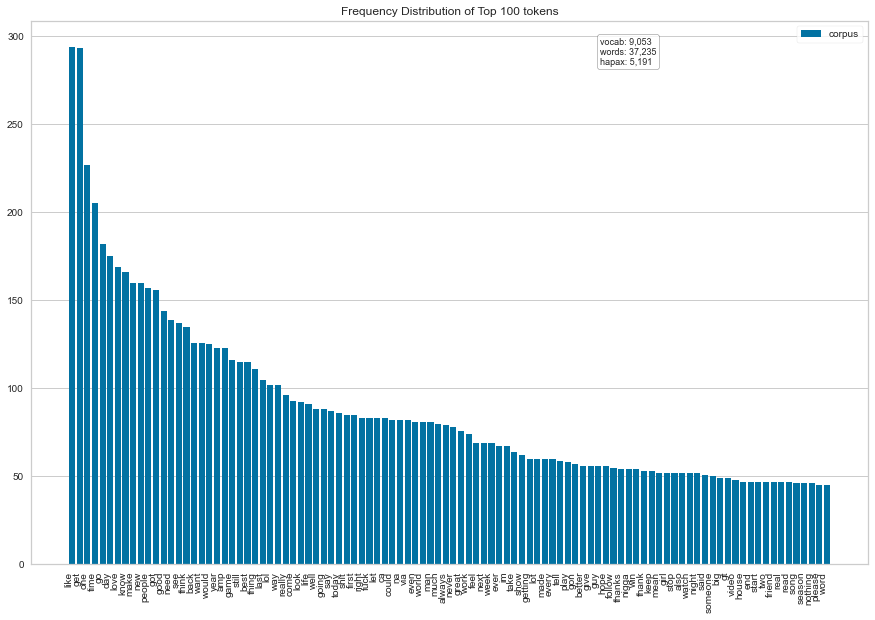

<AxesSubplot:title={'center':'Frequency Distribution of Top 100 tokens'}>

In [375]:
featuresm   = cvm.get_feature_names()

visualizerm = FreqDistVisualizer(features=featuresm, orient='v',size=(1080, 720),n = 100)
visualizerm.fit(Xm)
visualizerm.show()

In [376]:
# توزيع تردد الرمز المميز للنساء 

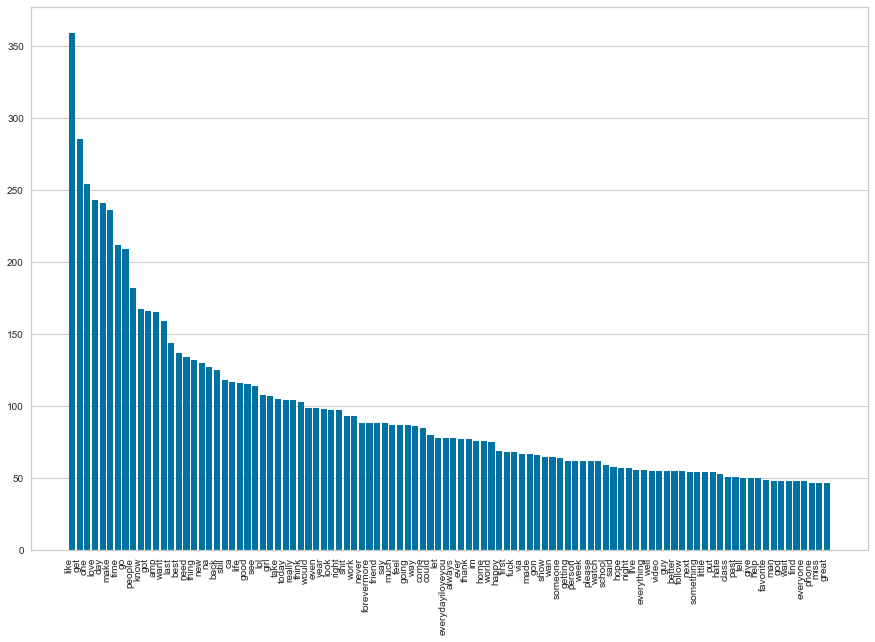

<AxesSubplot:title={'center':'Frequency Distribution of Top 100 tokens'}>

In [365]:
featuresf   = cvf.get_feature_names()

visualizerf = FreqDistVisualizer(features=featuresf, orient='v',size=(1080, 720),n = 100)
visualizerf.fit(Xf)
visualizerm.show()

# Step 5: conclusion

The 5 most common words used by females are 'like', 'get', 'one', 'love', 'day'.
The 5 most common words used by males are 'like', 'get', 'one', 'time', 'go'.